In [ ]:
!pip install psycopg2

In [ ]:
!pip install pandas

In [ ]:
!pip install seaborn

In [1]:
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
conn = psycopg2.connect(
    database = 'CREC',
    user = 'avnadmin',
    password = 'AVNS_a7L1IvJgihEtB4FMvwP',
    host = 'pg-463b20a-marconne195-e5f0.k.aivencloud.com',
    port = '12137'
)

# Relatório:
## Relatório 1:
### Objetivo: Obter relatório que mostre o nome de cada servidor(a) e a quantidade de chamados atendidos. De cada servidor, apresente a quantidade de alunos distintos atendidos a partir desses chamados.

In [ ]:
res = pd.read_sql_query('''
SELECT nome, count(*) as qtd_chamados, count(distinct CHAMADO.FK_ALUNO_id) as qtd_alunos
FROM SERVIDOR
LEFT JOIN CHAMADO
ON SERVIDOR.id = CHAMADO.FK_SERVIDOR_id
GROUP BY SERVIDOR.id
''', conn)
res

<ipython-input-19-4f7b17a8d6ed>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query('''


,nome,qtd_chamados,qtd_alunos
0,Euclides Peçanha,6,5
1,Olívia Martins,6,5
2,Carmen Miranda,6,6
3,Agenor Lima,6,4
4,Antônio Nunes,5,5
5,Diana Freitas,6,5


<Axes: xlabel='nome', ylabel='qtd_chamados'>

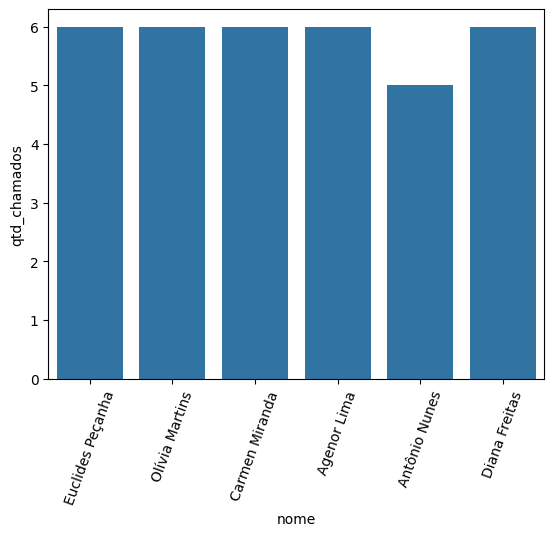

In [ ]:
plt.xticks(rotation=70)
sns.barplot(x='nome',y='qtd_chamados',data=res)

<Axes: xlabel='nome', ylabel='qtd_alunos'>

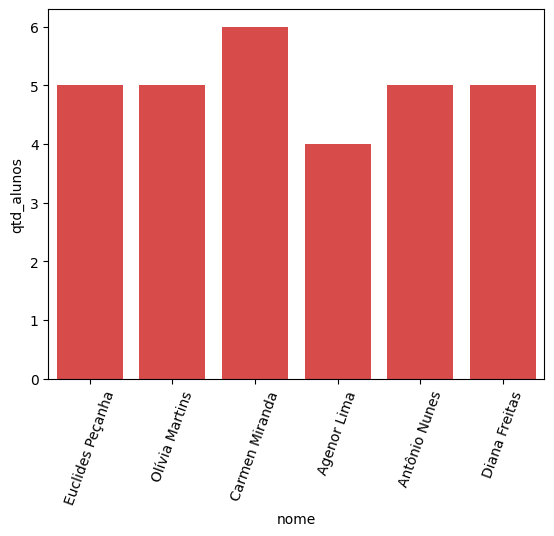

In [ ]:
plt.xticks(rotation=70)
# change color to purple
sns.barplot(x='nome',y='qtd_alunos',data=res, color="#ee3434")

## Relatório 2:

### Objetivo: Obter relatório que mostre o nome de cada orientador(a) e a quantidade de alunos orientados

In [ ]:
res = pd.read_sql_query('''
SELECT ORIENTADOR.nome as orientador, COUNT(*) as "qtd_alunos"
FROM ORIENTADOR
LEFT JOIN ALUNO
ON ORIENTADOR.id = ALUNO.FK_ORIENTADOR_id
GROUP BY ORIENTADOR.id
''', conn)
res

<ipython-input-8-07de868552b2>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query('''


,orientador,qtd_alunos
0,Maria Joana,4
1,Ana Clara,2
2,Lucas Fernandes,5
3,Maria Teixeira,5
4,Bruno Torres,3
5,Renata Alves,5
6,Gustavo Lima,5
7,Sofia Mendes,4
8,João Jonas,6
9,Pedro Prado,1


<Axes: xlabel='orientador', ylabel='qtd_alunos'>

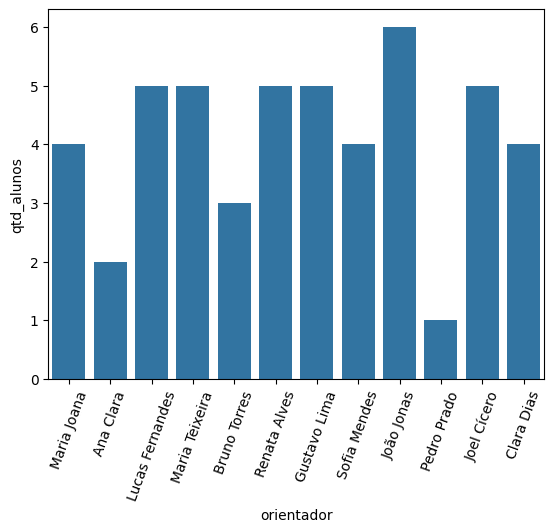

In [ ]:
plt.xticks(rotation=70)
sns.barplot(x='orientador',y='qtd_alunos',data=res)

## Relatório 3:
### Objetivo: Obter relatório que contém o índice de atividade de alunos em estágios.

In [ ]:
res = pd.read_sql_query('''
SELECT status, COUNT(*) as "qtd_alunos"
FROM ALUNO
GROUP BY status
''', conn)
res

<ipython-input-10-19089d505015>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query('''


,status,qtd_alunos
0,Inativo,18
1,Ativo,44


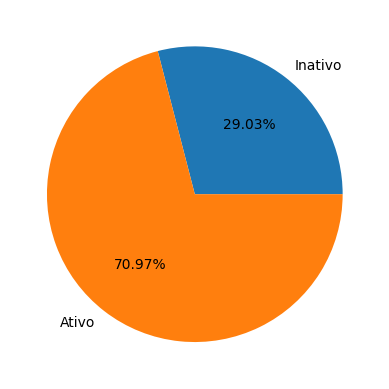

In [ ]:
colors = sns.color_palette('pastel')

plt.pie(res['qtd_alunos'], labels=res['status'], autopct='%.2f%%')
plt.show()

# Relatório 4:
### Objetivo: descobrir a quantidade de alunos estagiando em cada empresa

In [3]:
res = pd.read_sql_query('''
SELECT EMPRESA.nome as Empresa, COUNT(ALUNO.NOME) as "qtd_alunos"
FROM EMPRESA
INNER JOIN ALUNO
ON EMPRESA.ID = ALUNO.FK_EMPRESA_ID
GROUP BY EMPRESA.nome
''', conn)
res

<ipython-input-3-3fd0a751024a>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query('''


,empresa,qtd_alunos
0,GreenEnergy,2
1,TechVit,3
2,DataCloud,2
3,AutoDrive,1
4,PineApple,3
5,UrbanTech,3
6,LogicTech,2
7,InfoService,3
8,CyberSerra,3
9,SkyNet Tecnologias,1


<Axes: xlabel='empresa', ylabel='qtd_alunos'>

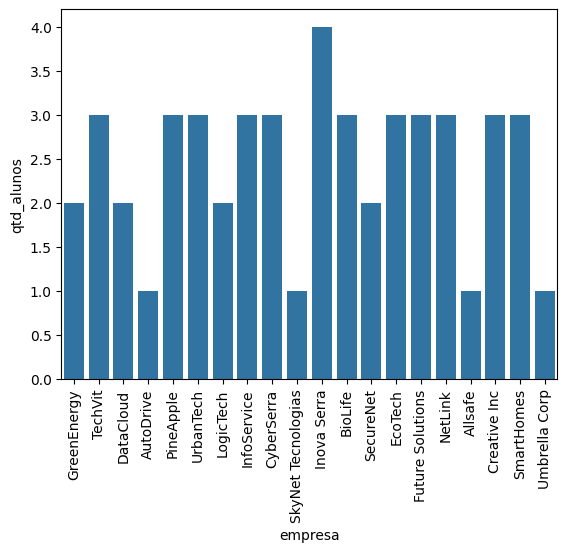

In [10]:
plt.xticks(rotation=90)
sns.barplot(x='empresa',y='qtd_alunos',data=res)

# Relatório 5:
### Objetivo: Saber quantos dias um chamado demora pra ser finalizado

In [ ]:
res = pd.read_sql_query('''
WITH Dias AS (
  SELECT
    DATE_PART('day', dt_fechamento - dt_abertura) + 1 AS duracao_em_dias
  FROM
    chamado
  WHERE dt_fechamento is not null
)
SELECT
  duracao_em_dias,
  COUNT(*) AS quantidade_chamados
FROM
  Dias
GROUP BY
  duracao_em_dias
ORDER BY
  duracao_em_dias;

''', conn)

res


<ipython-input-4-fccc45c5a0f1>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  res = pd.read_sql_query('''


,duracao_em_dias,quantidade_chamados
0,1.0,1
1,2.0,7
2,3.0,3
3,4.0,2
4,5.0,1
5,6.0,2
6,12.0,1


<Axes: xlabel='duracao_em_dias', ylabel='quantidade_chamados'>

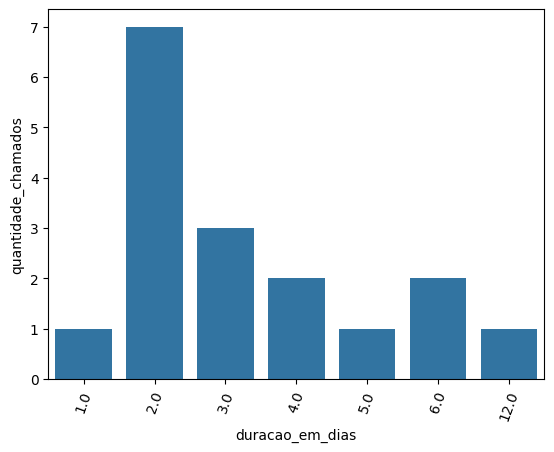

In [ ]:
plt.xticks(rotation=70)
sns.barplot(x='duracao_em_dias',y='quantidade_chamados',data=res)